In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.linalg
import random 
from random import choice
from PIL import Image, ImageChops
warnings.filterwarnings('ignore')

# 2.1

In [2]:
def similarity(v1,v2):
    if np.sqrt(v1.T.dot(v1)) == 0 or np.sqrt(v2.T.dot(v2)) == 0:
        return -1
    return v1.T.dot(v2)/(np.sqrt(v1.T.dot(v1))*np.sqrt(v2.T.dot(v2)))

def getMatch(img, patch, stride = 1):
    img = img.astype(np.float64)
    patch = patch.astype(np.float64)
    sz = patch.shape[0]
    bestVal = 0
    pos = -1
    c = 0
    for i in range(int(sz / 2), img.shape[0] - int(sz / 2), stride):
        similar = 0
        for j in range(int(sz / 2), img.shape[1] - int(sz / 2), stride):
            v = img[i - int(sz / 2): i + int(sz / 2) + 1, j - int(sz / 2): j + int(sz / 2) + 1].flatten()
            v = v - np.mean(v)
            p = patch.flatten() - np.mean(patch.flatten())
            similar = max(similar, similarity(v, p))
            if bestVal < similar:
                bestVal = similar
                pos = [i, j]
    return pos

def intensityBasedMatching(img1, img2, pts1, neighbourhood):
    pts2 = []
    for i in range(pts1.shape[0]):
        pts2.append(getMatch(img2, img1[pts1[i][0] - int(neighbourhood / 2): pts1[i][0] + int(neighbourhood / 2) + 1, pts1[i][1] - int(neighbourhood / 2): pts1[i][1] + int(neighbourhood / 2) + 1]))
    pts2 = np.asarray(pts2)
    return pts1, pts2


def drawlines(img1,img2,pts1,pts2):
    row = max(img1.shape[0],img2.shape[0])
    col = max(img1.shape[1],img2.shape[1])
    img3 = np.zeros((row,2*col,3))
    img3[0:img1.shape[0],0:img1.shape[1]] = img1
    img3[0:img2.shape[0],col:col + img2.shape[1]] = img2
    for i in range(pts1.shape[0]):
        color = tuple(np.random.randint(0,255,3).tolist())
        p = (pts1[i][1],pts1[i][0])
        q = (pts2[i][1]+col,pts2[i][0])
        img = cv2.line(img3,p,q,color,1)
        img = cv2.circle(img3, p, 1, color, 4)
        img = cv2.circle(img3, q, 1, color, 4)
        img=img.astype(np.uint8)
    return img

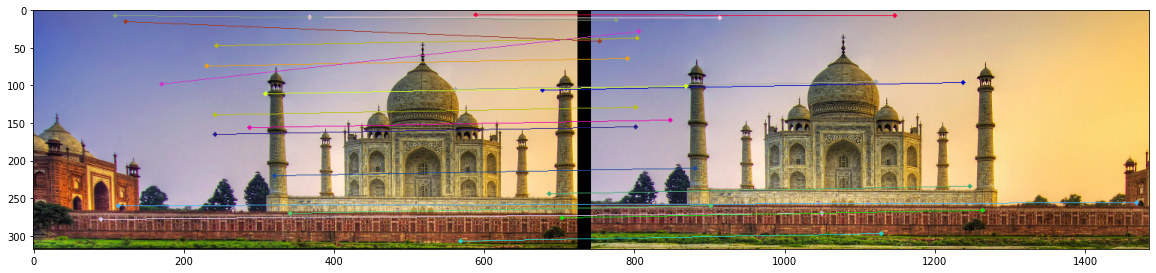

In [116]:
images=[]
for i in range(1,3):
    img=cv2.imread(f'./images/Stereo Correspondence/2_{i}.png')
    images.append(img)

pts1=[]
x=images[0].shape[0]
y=images[0].shape[1]
for i in range(0,20):
    pts1.append([random.randrange(x),random.randrange(y)])

pts1=np.asarray(pts1)


pts1, pts2 = intensityBasedMatching(images[0],images[1],pts1,5)

img=drawlines(images[0],images[1],pts1,pts2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,20))
# plt.axis("off")
plt.imshow(img)

In [12]:
images=[]
for i in range(1,3):
    img=cv2.imread(f'../images/Stereo Correspondence/3_{i}.jpg')
    images.append(img)

pts1=[]
x=images[0].shape[0]
y=images[0].shape[1]
for i in range(0,20):
    pts1.append([random.randrange(x),random.randrange(y)])

pts1=np.asarray(pts1)


pts1, pts2 = intensityBasedMatching(images[0],images[1],pts1,5)

img=drawlines(images[0],images[1],pts1,pts2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,20))
# plt.axis("off")
plt.imshow(img)

TypeError: 'int' object is not subscriptable

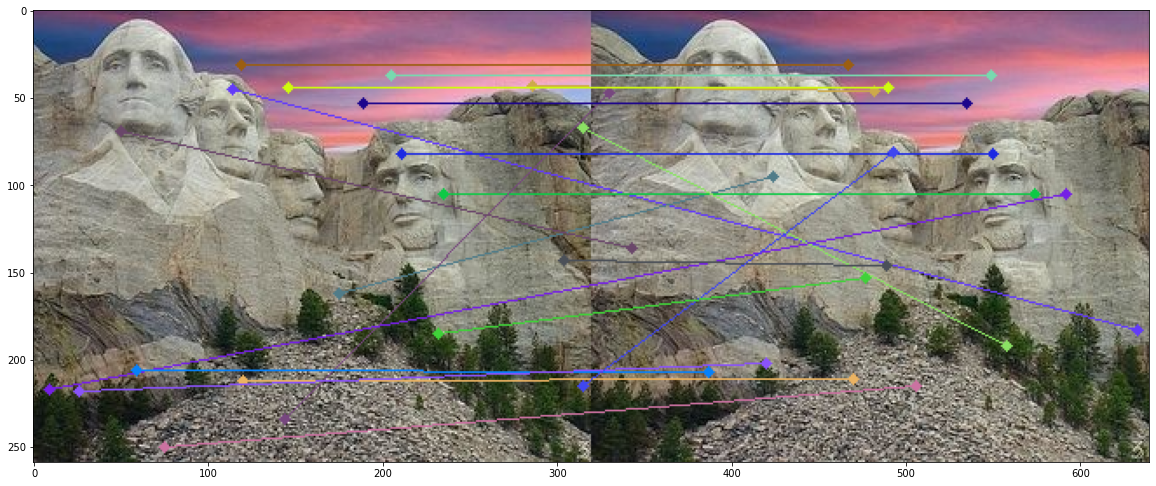

In [11]:
images=[]
for i in range(1,3):
    img=cv2.imread(f'../images/Stereo Correspondence/1_{i}.jpg')
    images.append(img)

pts1=[]
x=images[0].shape[0]
y=images[0].shape[1]
for i in range(0,20):
    pts1.append([random.randrange(x),random.randrange(y)])

pts1=np.asarray(pts1)


pts1, pts2 = intensityBasedMatching(images[0],images[1],pts1,5)

img=drawlines(images[0],images[1],pts1,pts2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,20))
# plt.axis("off")
plt.imshow(img)

# 2.2

In [16]:
def drawlines(imgl,imgr,lines,pts1,pts2):
    r,c,_ = img1.shape
    imgl = cv2.cvtColor(imgl,cv2.COLOR_GRAY2BGR)
    imgr = cv2.cvtColor(imgr,cv2.COLOR_GRAY2BGR)
    for r,p1,p2 in zip(lines,pts1,pts2):
        color = tuple([random.randrange(0, 255),random.randrange(0, 255),random.randrange(0, 255)])
#         if r[1] = 0 : continue
        try :
            x0, y0 = map(int, [0, -r[2] / (r[1] + 1e-9) ]) 
            x1, y1 = map(int,[c, -(r[2] + r[0] * c) / (r[1] + 1e-9) ])
            imgl = cv2.line(imgl,(x0, y0), (x1, y1), color, 1) 
            imgl = cv2.circle(imgl,tuple(p1), 5, color, -1) 
            imgr = cv2.circle(imgr,tuple(p2), 5, color, -1) 
        except : 
            print(x0,y0,x1,y1)
    return imgl, imgr 

def match(img1, img2):
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)
    
    good = []
    good = [[m] for m, n in matches if m.distance < 0.75*n.distance]        
    
    pts = np.array([])
    for m1 in good:
        (x1,y1) = kp1[m1[0].queryIdx].pt
        (x2,y2) = kp2[m1[0].trainIdx].pt
        if pts.size == 0:
            pts = np.array([[x2,y2,x1,y1]])
        else : 
            pts = np.vstack([pts,[x2,y2,x1,y1]])
    
#     img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, matchColor=(0, 255, 0), matchesMask=None, singlePointColor=(255, 0, 0), flags=2)
#     plt.imshow(img3)

    x1,y1 = pts[:,0],pts[:,1]
    x2,y2 = pts[:,2],pts[:,3]
    pts1 = np.asarray([x1,y1],dtype=np.int64).T
    pts2 = np.asarray([x2,y2],dtype=np.int64).T
    return pts1,pts2

def plot_lines(img1,img2):
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    pts1,pts2 = match(img1,img2)
    pts1 = np.int32(pts1)
    pts2 = np.int32(pts2)
    F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
    pts1m = pts1[mask.ravel() == 1]
    pts2m = pts2[mask.ravel() == 1]
    r,c = img1.shape
    asdf1 = cv2.computeCorrespondEpilines(pts2m.reshape(-1,1,2),2,F).reshape(-1,3)
    img6,img5 = drawlines(img1,img2,asdf1, pts1m,pts2m)
    asdf2 = cv2.computeCorrespondEpilines(pts1m.reshape(-1, 1, 2),1, F).reshape(-1, 3) 
    img3,img4 = drawlines(img2,img1, asdf2, pts2m,pts1m) 
    fig, sub = plt.subplots(nrows=1, ncols=2,figsize=(15,15))
    sub[0].imshow(img3)
    sub[0].axis('off')
    sub[1].imshow(img6)
    sub[1].axis('off')

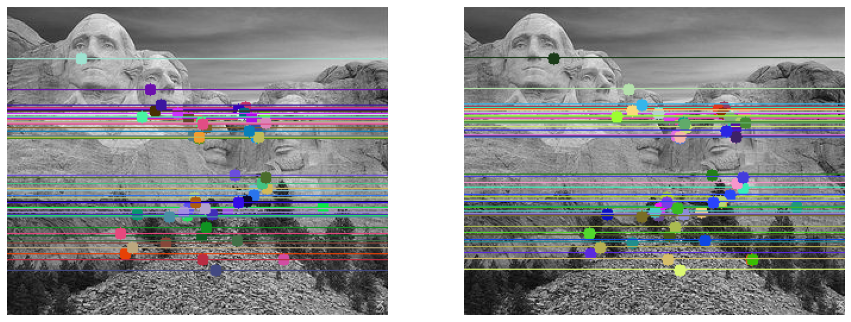

In [255]:
img1=cv2.imread(f'./images/Stereo Correspondence/1_1.jpg')
img2=cv2.imread(f'./images/Stereo Correspondence/1_2.jpg')
plot_lines(img1,img2)

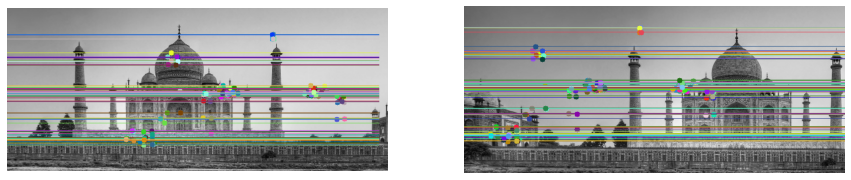

In [249]:
img1=cv2.imread(f'./images/Stereo Correspondence/2_1.png')
img2=cv2.imread(f'./images/Stereo Correspondence/2_2.png')
plot_lines(img1,img2)

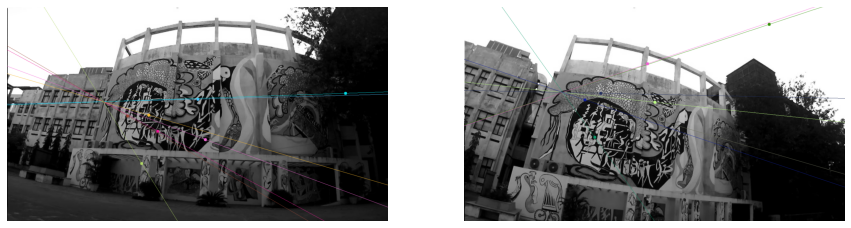

In [180]:
img1=cv2.imread(f'./images/Stereo Correspondence/3_1.jpg')
img2=cv2.imread(f'./images/Stereo Correspondence/3_2.jpg')
plot_lines(img1,img2)

# 2.3

In [14]:
def greedyhelper(img2,patch,idx,cr):
    sz = 10
    row = img2.shape[0]
    col = img2.shape[1]
    max_corr = -1
    coord = None
    for i in range(idx,col,1):
        if i + sz < col and cr + sz < row :
            curr = img2[cr:cr + sz,i:i + sz].flatten()
            curr = curr - np.mean(curr)
            corr = similarity(curr,patch)
            if corr > max_corr:
                max_corr = corr
                coord = [cr,i]
    return coord

def greedy(img1,img2,step,sz):
    row,col = img1.shape[0],img1.shape[1]
    matches = []
    pts1,pts2 = [],[]
    coord = None
    for i in range(step,row,step):
        last = step
        for j in range(step,col,step):
            if j + sz < col and i + sz < row:
                patch = img1[i:i + sz,j:j + sz].flatten()
                patch = patch - np.mean(patch)
                coord = greedyhelper(img2,patch,last,i)
                if coord is not None :
                    last = coord[1] + 1
                    matches.append([[i,j],coord])
                    pts1.append([i,j])
                    pts2.append(coord)
    pts1 = np.array(pts1)
    pts2 = np.array(pts2)
    return pts1,pts2

def rectify(img1,img2):
    pts1,pts2 = match(img1,img2)
    pts1 = np.int32(pts1)
    pts2 = np.int32(pts2)
    F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

    h1, w1,__ = img1.shape
    h2, w2, __ = img2.shape
    _, H1, H2 = cv2.stereoRectifyUncalibrated(np.float32(pts1), np.float32(pts2), F, imgSize=(w1, h1))

    img1r = cv2.warpPerspective(img1, H1, (w1, h1))
    img2r = cv2.warpPerspective(img2, H2, (w2, h2))

#     plot_lines(img1r,img2r)
    return img1r,img2r

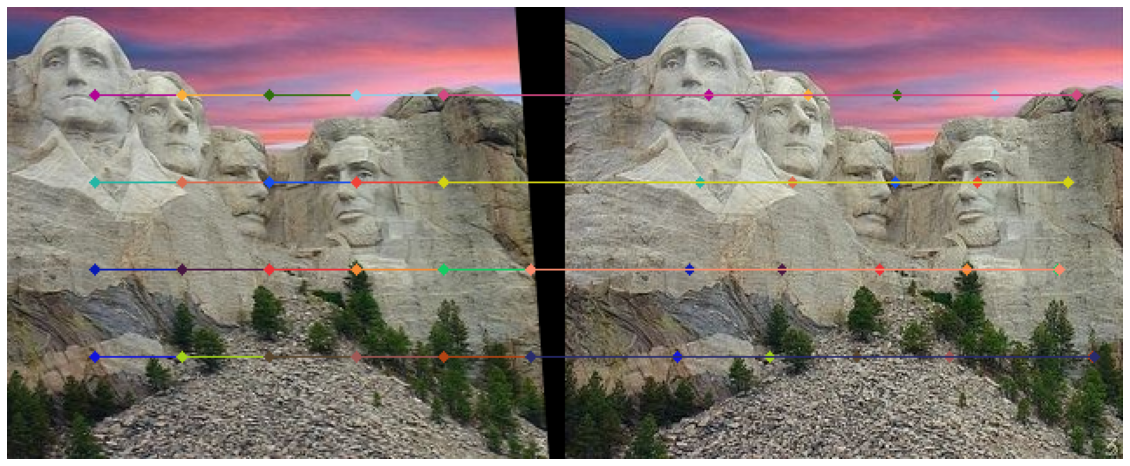

In [261]:
img1=cv2.imread(f'./images/Stereo Correspondence/1_1.jpg')
img2=cv2.imread(f'./images/Stereo Correspondence/1_2.jpg')
# plt.imshow(img1)

img1r,img2r=rectify(img1,img2)

pts1,pts2=greedy(img1r,img2r,50,10)

img=drawlines(img1r,img2r,pts1,pts2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,20))
plt.axis("off")
plt.imshow(img)

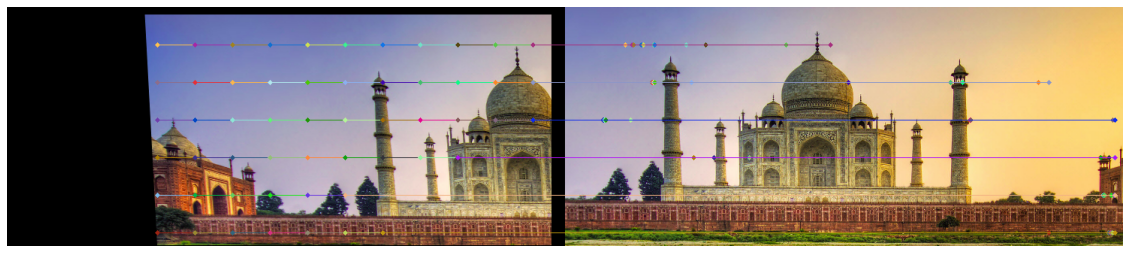

In [214]:
img1=cv2.imread(f'./images/Stereo Correspondence/2_1.png')
img2=cv2.imread(f'./images/Stereo Correspondence/2_2.png')
# plt.imshow(img1)

img1r,img2r=rectify(img1,img2)

pts1,pts2=greedy(img1r,img2r,50,10)

img=drawlines(img1r,img2r,pts1,pts2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,20))
plt.axis("off")
plt.imshow(img)

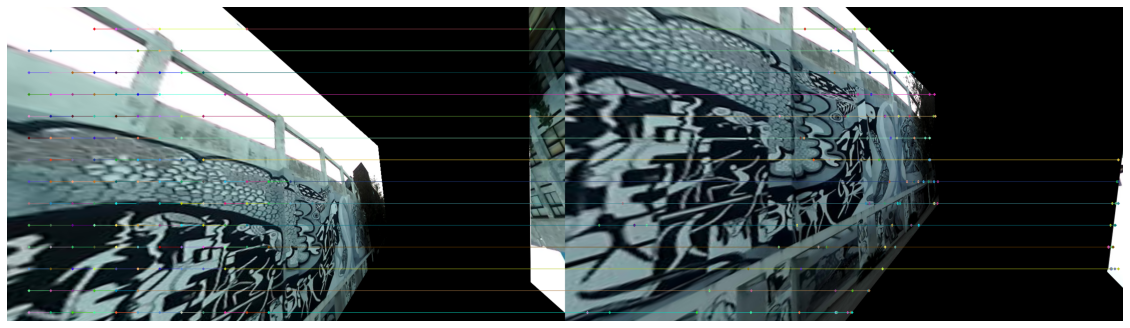

In [215]:
img1=cv2.imread(f'./images/Stereo Correspondence/3_1.jpg')
img2=cv2.imread(f'./images/Stereo Correspondence/3_2.jpg')
# plt.imshow(img1)

img1r,img2r=rectify(img1,img2)

pts1,pts2=greedyMatcher(img1r,img2r,50,10)

img=drawlines(img1r,img2r,pts1,pts2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,20))
plt.axis("off")
plt.imshow(img)

In [13]:
def brutehelper(img2,patch):
    sz = 10
    row = img2.shape[0]
    col = img2.shape[1]
    max_corr = -1
    coord = None
    for cr in range(sz//2,row,1):
        for i in range(sz//2,col,1):
            if i + sz//2 < col and cr + sz//2 < row:
                curr = img2[cr - sz//2:cr + sz//2,i - sz//2:i + sz//2].flatten()
                curr = curr - np.mean(curr)
                corr = similarity(curr,patch)
                if corr > max_corr:
                    max_corr = corr
                    coord = [cr,i]
    return coord

def bruteforce(img1,img2,step,sz):
    row = img1.shape[0]
    col = img1.shape[1]
    matches = []
    pts1,pts2 = [],[]
    coord = None
    for i in range(step,row,step):
        for j in range(step,col,step):
            if (img1[i][j] == [0, 0, 0]).all():
                continue
            if j + sz < col and i + sz < row :
                patch = img1[i - sz//2:i + sz//2,j - sz//2:j + sz//2].flatten()
                patch = patch - np.mean(patch)
                coord = brutehelper(img2,patch)
                if coord is not None :
                    matches.append([[i,j],coord])
                    pts1.append([i,j])
                    pts2.append(coord)
    pts1 = np.array(pts1)
    pts2 = np.array(pts2)
    return pts1,pts2
            
    
    

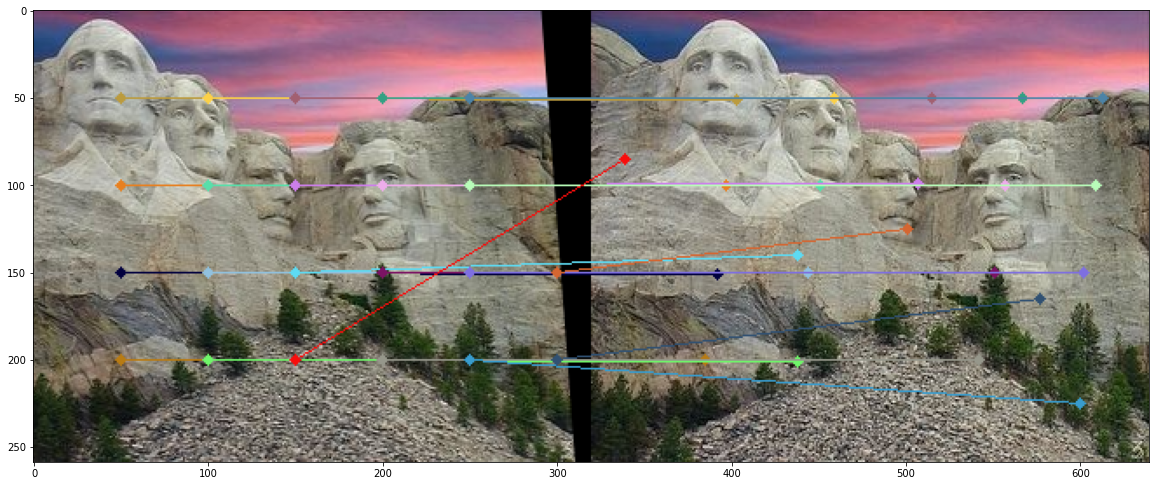

In [263]:
def drawlines(img1,img2,pts1,pts2):
    row = max(img1.shape[0],img2.shape[0])
    col = max(img1.shape[1],img2.shape[1])
    img3 = np.zeros((row,2*col,3))
    img3[0:img1.shape[0],0:img1.shape[1]] = img1
    img3[0:img2.shape[0],col:col + img2.shape[1]] = img2
    c=col
    for i in range(pts1.shape[0]):
        color = tuple(np.random.randint(0,255,3).tolist())
        p = (pts1[i][1],pts1[i][0])
        q = (pts2[i][1]+col,pts2[i][0])
        img = cv2.line(img3,p,q,color,1)
        img = cv2.circle(img3, p, 1, color, 4)
        img = cv2.circle(img3, q, 1, color, 4)
        img=img.astype(np.uint8)
    return img


img1=cv2.imread(f'./images/Stereo Correspondence/1_1.jpg')
img2=cv2.imread(f'./images/Stereo Correspondence/1_2.jpg')
# plt.imshow(img1)

img1r,img2r=rectify(img1,img2)

pts1,pts2=bruteforce(img1r,img2r,50,10)

img=drawlines(img1r,img2r,pts1,pts2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,20))
# plt.axis("off")
plt.imshow(img)

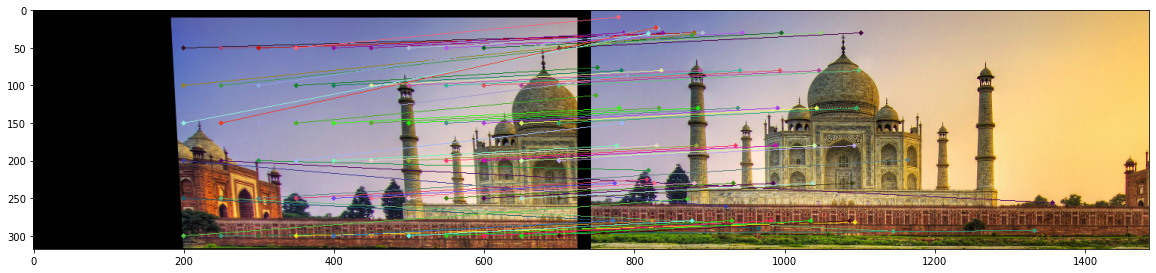

In [258]:
img1=cv2.imread(f'./images/Stereo Correspondence/2_1.png')
img2=cv2.imread(f'./images/Stereo Correspondence/2_2.png')
# plt.imshow(img1)

img1r,img2r=rectify(img1,img2)

pts1,pts2=bruteforce(img1r,img2r,50,10)

img=drawlines(img1r,img2r,pts1,pts2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,20))
# plt.axis("off")
plt.imshow(img)

In [18]:
img1=cv2.imread(f'../images/Stereo Correspondence/3_1.jpg')
img2=cv2.imread(f'../images/Stereo Correspondence/3_2.jpg')
# plt.imshow(img1)

img1r,img2r=rectify(img1,img2)

pts1,pts2=bruteforce(img1r,img2r,50,10)

img=drawlines(img1r,img2r,pts1,pts2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,20))
# plt.axis("off")
plt.imshow(img)

TypeError: drawlines() missing 1 required positional argument: 'pts2'

# SIFT (Bonus)

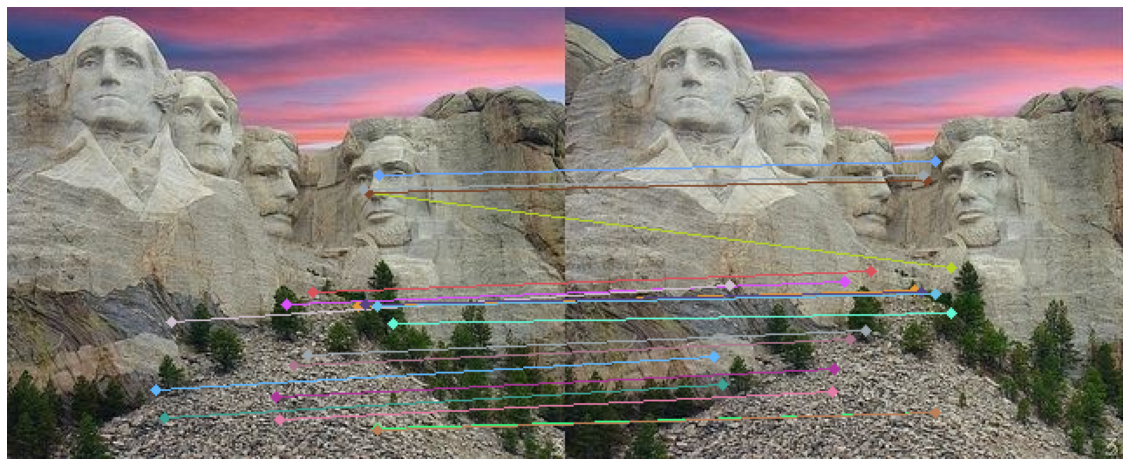

In [233]:
def drawlines(img1,img2,pts1,pts2):
    row = max(img1.shape[0],img2.shape[0])
    col = max(img1.shape[1],img2.shape[1])
    img3 = np.zeros((row,2*col,3))
    img3[0:img1.shape[0],0:img1.shape[1]] = img1
    img3[0:img2.shape[0],col:col + img2.shape[1]] = img2
    c=col
    for i in range(pts1.shape[0]):
        color = tuple(np.random.randint(0,255,3).tolist())
        p = (pts1[i][1],pts1[i][0])
        q = (pts2[i][1]+col,pts2[i][0])
        img = cv2.line(img3,p,q,color,1)
        img = cv2.circle(img3, p, 1, color, 4)
        img = cv2.circle(img3, q, 1, color, 4)
        img=img.astype(np.uint8)
    return img

img1=cv2.imread(f'./images/Stereo Correspondence/1_1.jpg')
img2=cv2.imread(f'./images/Stereo Correspondence/1_2.jpg')
pts1,pts2 = match(img1,img2)
img = drawlines(img1,img2,pts1[0:20],pts2[0:20])

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,20))
plt.axis("off")
plt.imshow(img)

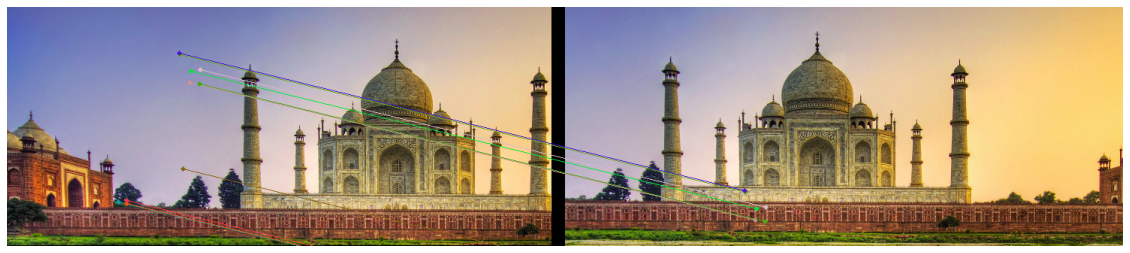

In [234]:
img1=cv2.imread(f'./images/Stereo Correspondence/2_1.png')
img2=cv2.imread(f'./images/Stereo Correspondence/2_2.png')
pts1,pts2 = match(img1,img2)
img = drawlines(img1,img2,pts1[0:20],pts2[0:20])

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,20))
plt.axis("off")
plt.imshow(img)

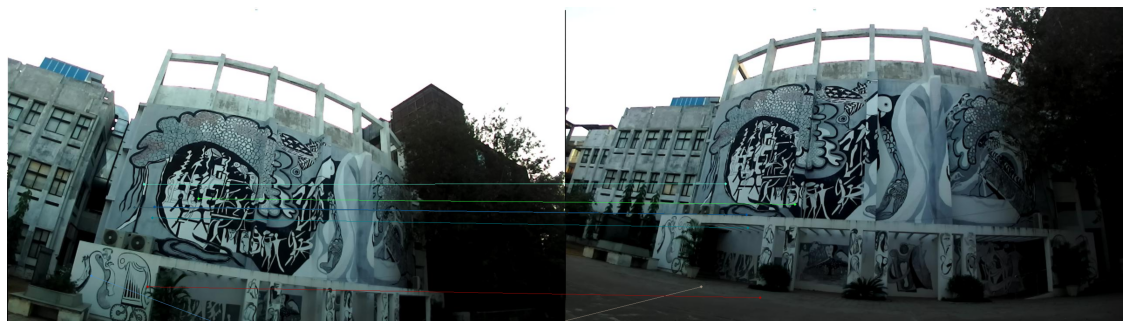

In [236]:
img1=cv2.imread(f'./images/Stereo Correspondence/3_1.jpg')
img2=cv2.imread(f'./images/Stereo Correspondence/3_2.jpg')
pts1,pts2 = match(img1,img2)
img = drawlines(img1,img2,pts1[0:20],pts2[0:20])

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,20))
plt.axis("off")
plt.imshow(img)